# II. Implement the following:

In [33]:
import numpy as np
import pandas as pd

# Create the XOR truth table dataset
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([[0],  # XOR(0,0) = 0
              [1],  # XOR(0,1) = 1
              [1],  # XOR(1,0) = 1
              [0]]) # XOR(1,1) = 0

# Create a DataFrame for better visualization
xor_df = pd.DataFrame(data=np.hstack((X, y)), columns=['Input1', 'Input2', 'Output'])
print(xor_df)


   Input1  Input2  Output
0       0       0       0
1       0       1       1
2       1       0       1
3       1       1       0


In [41]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Initialize and train the Single Layer Perceptron (SLP)
perceptron = Perceptron(max_iter=10, eta0=0.1, random_state=0)
perceptron.fit(X, y.ravel())

# Predictions for SLP
predictions = perceptron.predict(X)

# Calculate SLP accuracy
slp_accuracy = accuracy_score(y, predictions)
print("SLP Accuracy: {:.2f}%".format(slp_accuracy * 100))


SLP Accuracy: 50.00%


The accuracy of the single-layer perceptron is not satisfactory (50%). This is because the XOR problem is not linearly separable, meaning a single perceptron cannot solve this problem effectively.

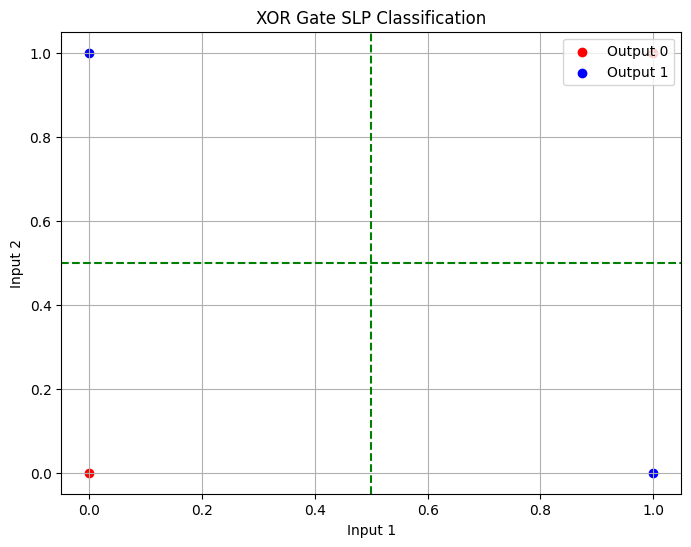

In [45]:
import matplotlib.pyplot as plt

# Visualization for SLP output
plt.figure(figsize=(8, 6))
plt.scatter(X[y.ravel() == 0][:, 0], X[y.ravel() == 0][:, 1], color='red', label='Output 0')
plt.scatter(X[y.ravel() == 1][:, 0], X[y.ravel() == 1][:, 1], color='blue', label='Output 1')
plt.title('XOR Gate SLP Classification')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.axhline(0.5, color='green', linestyle='--')
plt.axvline(0.5, color='green', linestyle='--')
plt.legend()
plt.grid()
plt.show()


In [42]:
from sklearn.neural_network import MLPClassifier

# Initialize and train the Multi-Layer Perceptron (MLP)
mlp = MLPClassifier(hidden_layer_sizes=(2,), max_iter=1000, random_state=0)
mlp.fit(X, y.ravel())

# Predictions for MLP
mlp_predictions = mlp.predict(X)

# Calculate MLP accuracy
mlp_accuracy = accuracy_score(y, mlp_predictions)
print("MLP Accuracy: {:.2f}%".format(mlp_accuracy * 100))


MLP Accuracy: 75.00%


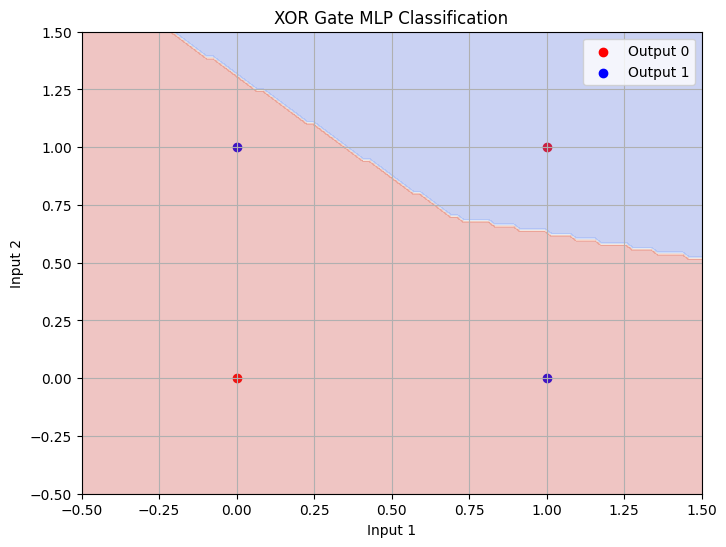

In [44]:
# Visualization for MLP output
plt.figure(figsize=(8, 6))
plt.scatter(X[y.ravel() == 0][:, 0], X[y.ravel() == 0][:, 1], color='red', label='Output 0')
plt.scatter(X[y.ravel() == 1][:, 0], X[y.ravel() == 1][:, 1], color='blue', label='Output 1')

# Plot decision boundary for MLP
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.title('XOR Gate MLP Classification')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.legend()
plt.grid()
plt.show()



## Question 2:

In [4]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

nltk.download('stopwords')

tweets_df = pd.read_csv('/content/Tweets - Tweets.csv')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
print(tweets_df.isnull().sum())

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   2363
negativereason_confidence        2033
airline                             0
airline_sentiment_gold          11504
name                                0
negativereason_gold             11509
retweet_count                       0
text                                0
tweet_coord                     10703
tweet_created                       0
tweet_location                   3771
user_timezone                    3849
dtype: int64


In [12]:
# Drop rows with missing text or sentiment values
tweets_df = tweets_df.dropna(subset=['text', 'airline_sentiment'])


In [25]:
columns_to_drop = [
    'negativereason',
    'negativereason_confidence',
    'airline_sentiment_gold',
    'negativereason_gold',
    'tweet_coord',
    'tweet_location',
    'user_timezone'
]

# Check if columns exist before dropping
columns_to_drop = [col for col in columns_to_drop if col in tweets_df.columns]

# Only drop columns that exist in the DataFrame
tweets_df = tweets_df.drop(columns=columns_to_drop, errors='ignore')

tweets_df = tweets_df.dropna(subset=['text', 'airline_sentiment'])

# Verify that there are no more null values
print(tweets_df.isnull().sum())

tweet_id                        0
airline_sentiment               0
airline_sentiment_confidence    0
airline                         0
name                            0
retweet_count                   0
text                            0
tweet_created                   0
sentiment_label                 0
cleaned_text                    0
dtype: int64


In [26]:
# Step 4: Text cleaning function
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text.lower())  # Remove punctuation and lowercase text
    words = text.split()
    stop_words = set(stopwords.words('english'))
    return ' '.join([word for word in words if word not in stop_words])

# Apply text cleaning
tweets_df['cleaned_text'] = tweets_df['text'].apply(clean_text)



In [27]:
# Step 5: Convert the text into a matrix of token counts (Bag of Words)
vectorizer = CountVectorizer(max_features=2000)
X = vectorizer.fit_transform(tweets_df['cleaned_text']).toarray()

# Step 6: Target labels
y = tweets_df['sentiment_label'].values

# Step 7: Split the data into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Filter out neutral tweets and keep only positive and negative sentiments
binary_sentiment_df = tweets_df[tweets_df['airline_sentiment'].isin(['positive', 'negative'])]

# Encode the target sentiment: 1 for positive, 0 for negative
binary_sentiment_df['sentiment_label'] = binary_sentiment_df['airline_sentiment'].map({'positive': 1, 'negative': 0})


<ipython-input-29-a29931fd3ce3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='airline_sentiment', data=tweets_df, palette='viridis')


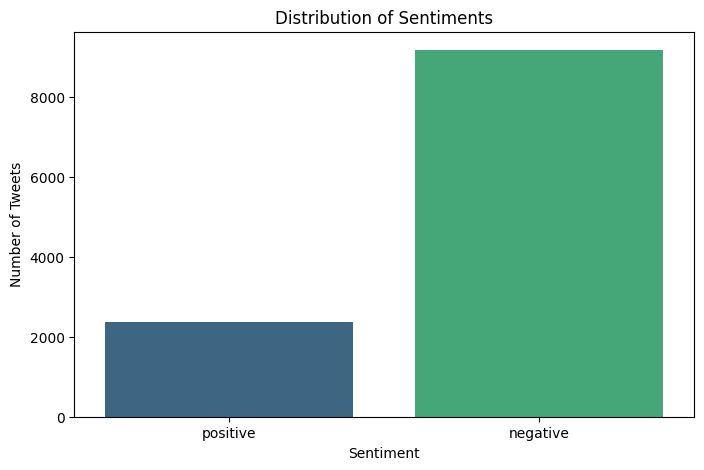

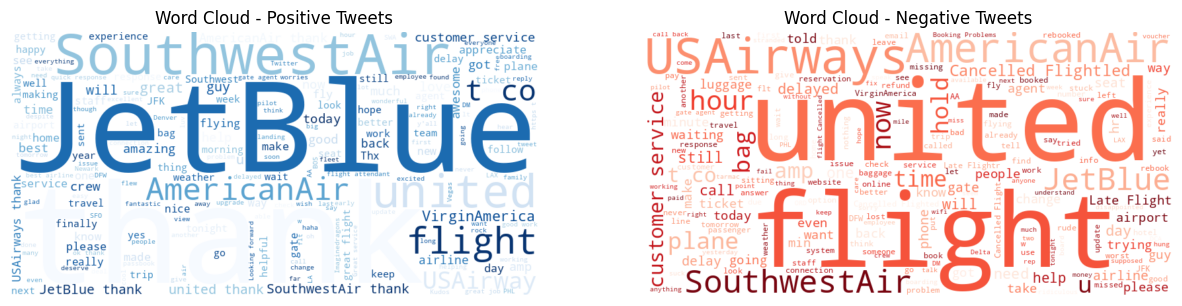

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from collections import Counter
plt.figure(figsize=(8, 5))
sns.countplot(x='airline_sentiment', data=tweets_df, palette='viridis')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

# Step 6: Generate word clouds for positive and negative tweets
positive_tweets = " ".join(binary_sentiment_df[binary_sentiment_df['sentiment_label'] == 1]['text'].values)
negative_tweets = " ".join(binary_sentiment_df[binary_sentiment_df['sentiment_label'] == 0]['text'].values)

wordcloud_positive = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(positive_tweets)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_tweets)

# Plot word clouds
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Positive Tweets')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Negative Tweets')

plt.show()

### Create a simple feed-forward neural network for binary sentiment classificatio(positive/negative).

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Function to create a feed-forward neural network model
def create_model(activation_function):
    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], activation=activation_function))  # Hidden layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return model


### Experiment with different activation functions (sigmoid, ReLU, tanh) in the hidden layer and compare the model's performance.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
289/289 - 3s - 11ms/step - accuracy: 0.8217 - loss: 0.3841 - val_accuracy: 0.9060 - val_loss: 0.2822
Epoch 2/20
289/289 - 3s - 12ms/step - accuracy: 0.9153 - loss: 0.2349 - val_accuracy: 0.9225 - val_loss: 0.2204
Epoch 3/20
289/289 - 4s - 14ms/step - accuracy: 0.9352 - loss: 0.1796 - val_accuracy: 0.9242 - val_loss: 0.2051
Epoch 4/20
289/289 - 2s - 7ms/step - accuracy: 0.9453 - loss: 0.1531 - val_accuracy: 0.9207 - val_loss: 0.2052
Epoch 5/20
289/289 - 2s - 8ms/step - accuracy: 0.9515 - loss: 0.1362 - val_accuracy: 0.9216 - val_loss: 0.2095
Epoch 6/20
289/289 - 3s - 9ms/step - accuracy: 0.9555 - loss: 0.1236 - val_accuracy: 0.9186 - val_loss: 0.2173
Epoch 7/20
289/289 - 3s - 12ms/step - accuracy: 0.9581 - loss: 0.1145 - val_accuracy: 0.9181 - val_loss: 0.2258
Epoch 8/20
289/289 - 4s - 13ms/step - accuracy: 0.9604 - loss: 0.1073 - val_accuracy: 0.9147 - val_loss: 0.2375
Epoch 9/20
289/289 - 2s - 7ms/step - accuracy: 0.9639 - loss: 0.1015 - val_accuracy: 0.9160 - val_loss: 0.2

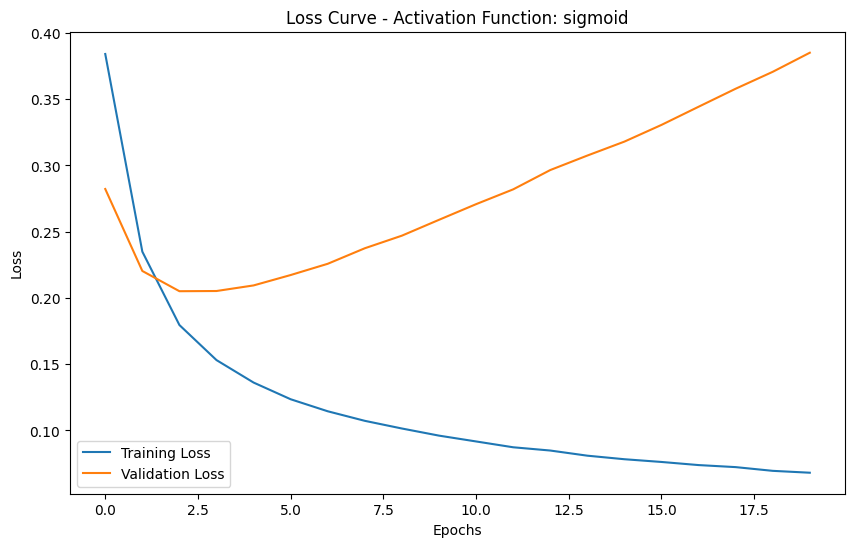

Test Accuracy with sigmoid activation: 0.9052
Epoch 1/20
289/289 - 5s - 16ms/step - accuracy: 0.8620 - loss: 0.3174 - val_accuracy: 0.9212 - val_loss: 0.2096
Epoch 2/20
289/289 - 4s - 14ms/step - accuracy: 0.9380 - loss: 0.1638 - val_accuracy: 0.9173 - val_loss: 0.2127
Epoch 3/20
289/289 - 3s - 9ms/step - accuracy: 0.9555 - loss: 0.1204 - val_accuracy: 0.9164 - val_loss: 0.2313
Epoch 4/20
289/289 - 3s - 9ms/step - accuracy: 0.9656 - loss: 0.0936 - val_accuracy: 0.9142 - val_loss: 0.2526
Epoch 5/20
289/289 - 4s - 14ms/step - accuracy: 0.9729 - loss: 0.0733 - val_accuracy: 0.9117 - val_loss: 0.2782
Epoch 6/20
289/289 - 4s - 13ms/step - accuracy: 0.9820 - loss: 0.0564 - val_accuracy: 0.9099 - val_loss: 0.3056
Epoch 7/20
289/289 - 2s - 7ms/step - accuracy: 0.9861 - loss: 0.0437 - val_accuracy: 0.9112 - val_loss: 0.3259
Epoch 8/20
289/289 - 2s - 8ms/step - accuracy: 0.9904 - loss: 0.0337 - val_accuracy: 0.9104 - val_loss: 0.3456
Epoch 9/20
289/289 - 3s - 11ms/step - accuracy: 0.9923 - loss:

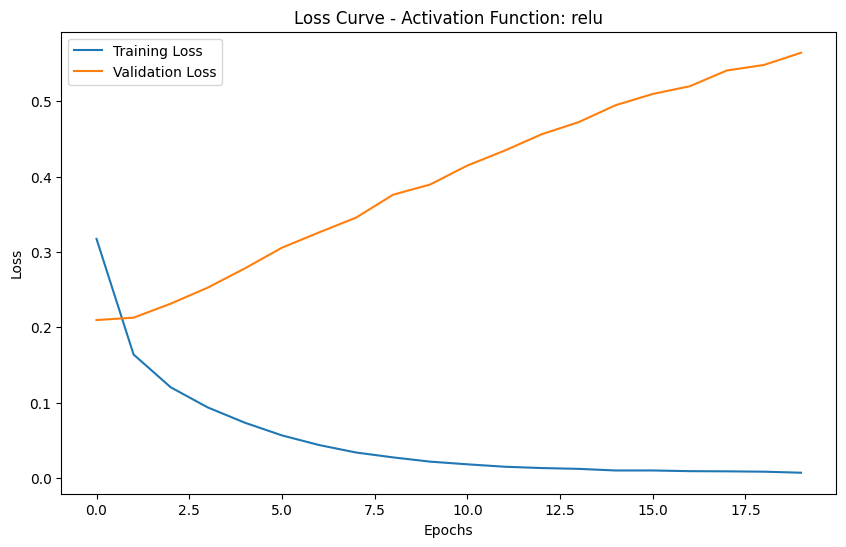

Test Accuracy with relu activation: 0.9052
Epoch 1/20
289/289 - 3s - 11ms/step - accuracy: 0.8856 - loss: 0.2791 - val_accuracy: 0.9203 - val_loss: 0.2054
Epoch 2/20
289/289 - 3s - 10ms/step - accuracy: 0.9402 - loss: 0.1607 - val_accuracy: 0.9155 - val_loss: 0.2249
Epoch 3/20
289/289 - 2s - 8ms/step - accuracy: 0.9509 - loss: 0.1308 - val_accuracy: 0.9186 - val_loss: 0.2463
Epoch 4/20
289/289 - 2s - 8ms/step - accuracy: 0.9558 - loss: 0.1153 - val_accuracy: 0.9142 - val_loss: 0.2783
Epoch 5/20
289/289 - 3s - 9ms/step - accuracy: 0.9592 - loss: 0.1069 - val_accuracy: 0.9095 - val_loss: 0.3053
Epoch 6/20
289/289 - 2s - 8ms/step - accuracy: 0.9615 - loss: 0.0974 - val_accuracy: 0.9056 - val_loss: 0.3261
Epoch 7/20
289/289 - 3s - 12ms/step - accuracy: 0.9641 - loss: 0.0920 - val_accuracy: 0.9082 - val_loss: 0.3513
Epoch 8/20
289/289 - 4s - 15ms/step - accuracy: 0.9654 - loss: 0.0872 - val_accuracy: 0.9021 - val_loss: 0.3801
Epoch 9/20
289/289 - 2s - 9ms/step - accuracy: 0.9657 - loss: 0.0

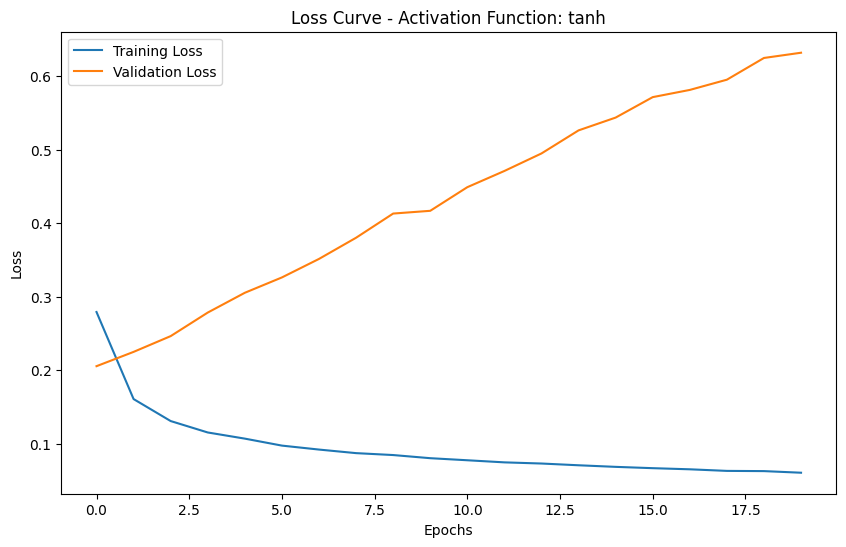

Test Accuracy with tanh activation: 0.8913


In [31]:
# Function to train the model and plot the loss curve
def train_and_plot(activation_function):
    # Create the model
    model = create_model(activation_function)

    # Train the model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose=2)

    # Plot the loss curve
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Loss Curve - Activation Function: {activation_function}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Evaluate the model on the test set
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f'Test Accuracy with {activation_function} activation: {accuracy:.4f}')

# Experiment with Sigmoid, ReLU, and Tanh activation functions
train_and_plot('sigmoid')
train_and_plot('relu')
train_and_plot('tanh')


### Interpretation of Sigmoid Loss Curve
1. **Training Loss (Blue Line)**:
   - The training loss starts relatively high but decreases sharply in the initial epochs. This indicates that the model is effectively learning the patterns in the training data.
   - The training loss eventually stabilizes around a lower value, suggesting that the model has converged to a solution for the training data.

2. **Validation Loss (Orange Line)**:
   - The validation loss also decreases initially but starts to increase after a certain point (around 5 epochs). This divergence suggests that the model begins to overfit the training data after a few epochs.
   - Overfitting occurs when the model learns the training data too well, including the noise, leading to poor generalization to unseen data (validation set).

3. **Comparison of Losses**:
   - The fact that the validation loss starts to rise while the training loss continues to decrease indicates that the model is fitting the training data more closely than it is fitting the validation data. This is a classic sign of overfitting.
   - Ideally, we want both training and validation losses to decrease and stabilize at low values without diverging.

4. **Final Loss Values**:
   - The final training loss is low (around 0.0681), indicating a well-fitted model on the training data.
   - However, the validation loss is considerably higher (around 0.3850), highlighting that the model does not generalize well to new, unseen data.

### Interpretation of ReLu Loss Curve

1. **Training Loss (Blue Line)**:
   - The training loss consistently decreases over the epochs, which is a positive indication that the model is learning and fitting to the training data. This generally suggests that the model is improving its performance on the training dataset.

2. **Validation Loss (Orange Line)**:
   - The validation loss initially decreases, which is expected as the model starts to learn. However, at around the 5-6 epochs mark, the validation loss starts to increase. This indicates that the model begins to overfit the training data, meaning it is performing well on the training set but failing to generalize to unseen data (the validation set).

3. **Overfitting**:
   - The divergence between the training and validation loss is significant. While the training loss continues to drop, the increasing validation loss suggests that the model is memorizing the training data rather than learning the underlying patterns, leading to poor performance on new data.

### Conclusion
Overall, the curve indicates that while the model has learned from the training data, it may benefit from regularization techniques (like dropout or weight decay) or adjustments in architecture to prevent overfitting. Additionally, training for too many epochs without intervention could lead to suboptimal model performance.

### Interpretation of tanh Loss Curve

1. **Training Loss (Blue Line)**:
   - The training loss shows a steady decline throughout the epochs, which indicates that the model is effectively learning from the training data. This consistent decrease in training loss is a good sign that the model is fitting the data well.

2. **Validation Loss (Orange Line)**:
   - The validation loss initially decreases but begins to increase after a certain point, suggesting that the model starts to overfit the training data after approximately 7 epochs. While the model fits the training data better over time, it loses its ability to generalize to new, unseen data as evidenced by the increasing validation loss.

3. **Overfitting**:
   - The gap between the training and validation loss indicates overfitting. While the model becomes increasingly adept at predicting training data, its performance on validation data diminishes, which can lead to poor predictions on new instances.

4. **Test Accuracy**:
   - The reported test accuracy of **0.8913** suggests that the model performs reasonably well on the test set, but the noticeable overfitting indicated by the loss curve may mean that its ability to generalize could be compromised, particularly with data that differs from the training set.

### Conclusion
In summary, while the model shows effective learning on the training set, the increase in validation loss points to overfitting, which is a common challenge in neural network training. Implementing strategies such as early stopping, dropout layers, or adjusting the complexity of the model could help improve generalization and performance on unseen data.